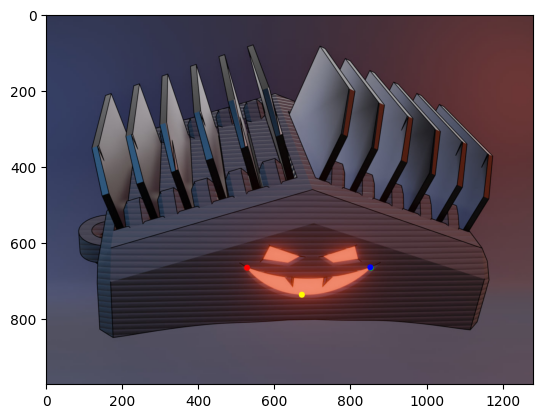

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('../lab1/test.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Файл не найден"

# бинаризация изображения с порогом 127
ret, thresh = cv.threshold(img, 127, 255, 0)

# нахождение контуров
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
assert len(contours) > 0, "no contours found"
cnt = contours[0]

# 1) Aspect Ratio — соотношение сторон ограничивающего прямоугольника
x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h

# 2) Extent — доля площади контура от площади его ограничивающего прямоугольника
area = cv.contourArea(cnt)
rect_area = w*h
extent = float(area)/rect_area

# 3) Solidity — доля площади контура от площади его выпуклой оболочки
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area

# 4) Equivalent Diameter — диаметр круга с той же площадью, что и контур
equi_diameter = np.sqrt(4*area/np.pi)

# 5) Orientation — ориентация объекта (угол наклона), а также длины главной и малой осей
(x_,y_),(MA,ma),angle = cv.fitEllipse(cnt)

# 6) Mask и Pixel Points — маска объекта и список пикселей, принадлежащих ему
mask = np.zeros(img.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
# либо альтернативно: # pixelpoints = cv.findNonZero(mask)

# 7) Максимальное и минимальное значение и их местоположение
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(img, mask = mask)

# 8) Средний цвет или средняя интенсивность объекта
mean_val = cv.mean(img, mask = mask)

# 9) Экстремальные точки — крайние точки контура
leftmost   = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost  = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost    = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

img_color = cv.imread('../lab1/test.jpg')

cv.circle(img_color, leftmost,   8, (0, 0, 255), -1)    # красная точка — левая
cv.circle(img_color, rightmost,  8, (0, 255, 0), -1)    # зелёная — правая
cv.circle(img_color, topmost,    8, (255, 0, 0), -1)    # синяя — верхняя
cv.circle(img_color, bottommost, 8, (0, 255, 255), -1)  # жёлтая — нижняя

img_color = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
plt.imshow(img_color)